In [1]:
import pandas as pd

df = pd.read_csv('titanic.csv')
features = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
targets = df['Fare']

In [2]:
# 缺失值
age_mean = features['Age'].mean()
fare_mean = targets.mean()
features['Age'] = features['Age'].fillna(age_mean)
targets = targets.fillna(fare_mean)

# Preprocessing
features['Sex'] = features['Sex'].map({'female':0, 'male':1})
features['Pclass'] = features['Pclass'] - 1
features['Embarked'] = features['Embarked'].map({'C':0, 'Q':1, 'S':2})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

In [3]:
from keras.utils import to_categorical

# One-hot encoding
Pclass = pd.DataFrame(to_categorical(features['Pclass'], num_classes=3, dtype=int))
Embarked = pd.DataFrame(to_categorical(features['Embarked'], num_classes=3, dtype=int))

Using TensorFlow backend.


In [4]:
# Normalize
def min_max(data):
    return (data - data.min()) / (data.max() - data.min())

features['Age'] = min_max(features['Age'])
features['SibSp'] = min_max(features['SibSp'])
features['Parch'] = min_max(features['Parch'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

In [5]:
features = pd.concat([features[['Sex', 'Age', 'SibSp', 'Parch']], Pclass, Embarked], axis=1).values
targets = min_max(targets).values

In [6]:
# 切割資料
x_train = features[:1000]
y_train = targets[:1000]
x_test = features[1000:]
y_test = targets[1000:]

In [7]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=5, input_dim=10, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='MSE', optimizer='adam')

In [9]:
train_history = model.fit(x=x_train,
                          y=y_train,
                          validation_split=0.2,
                          epochs=50,
                          batch_size=50,
                          verbose=1)

Train on 800 samples, validate on 200 samples
Epoch 1/50
800/800 [==============================] - 1s 2ms/step - loss: 0.3129 - val_loss: 0.2984
Epoch 2/50
800/800 [==============================] - 0s 37us/step - loss: 0.2888 - val_loss: 0.2754
Epoch 3/50
800/800 [==============================] - 0s 35us/step - loss: 0.2671 - val_loss: 0.2555
Epoch 4/50
800/800 [==============================] - 0s 32us/step - loss: 0.2479 - val_loss: 0.2370
Epoch 5/50
800/800 [==============================] - 0s 33us/step - loss: 0.2298 - val_loss: 0.2190
Epoch 6/50
800/800 [==============================] - 0s 34us/step - loss: 0.2116 - val_loss: 0.2004
Epoch 7/50
800/800 [==============================] - 0s 32us/step - loss: 0.1933 - val_loss: 0.1824
Epoch 8/50
800/800 [==============================] - 0s 32us/step - loss: 0.1759 - val_loss: 0.1657
Epoch 9/50
800/800 [==============================] - 0s 34us/step - loss: 0.1597 - val_loss: 0.1496
Epoch 10/50
800/800 [=========================

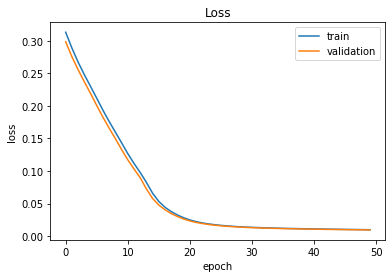

In [11]:
import matplotlib.pyplot as plt

plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
plt.close()

In [12]:
test_loss = model.evaluate(x=x_test, y=y_test)
y_predict = model.predict(x=x_test)

309/309 [==============================] - 0s 71us/step
